<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Point Processing

In the previous tutorial, you learnt the basics of image manipulation and colour isolation. Today, you will learn how to implement point processing methods to enhance images for the following tasks: e.g. segmentation, recognition. 

Point processing helps us manipulate every pixel of an image by applying a transformation. This is defined by $g(x, y) = T [f(x, y)]$ where $g(x, y)$ is the output image. 

Take into account that our lecture is short so we will only process grey-scale images. However, to research and to implement the same methods to colour images is up to you and highly encouraged. 

## Negative Transformation
The first transformation inverts the identity transformation to get the negative of a picture. To do so, each pixel of the input image is subtracted from the $L-1$ and mapped onto the output image. $L = 2^k$ where $k$ = number of bits to represent a pixel. 

As explained in class, if the pixels of an image will save only 6 gray levels, we will only need 3 bits because we can save up to 7 gray levels (111 in binary), otherwise, we would need to consider 4 or more bits. Normally, we save up to 256 gray values per pixel: $L = 2^8; 8 bits$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

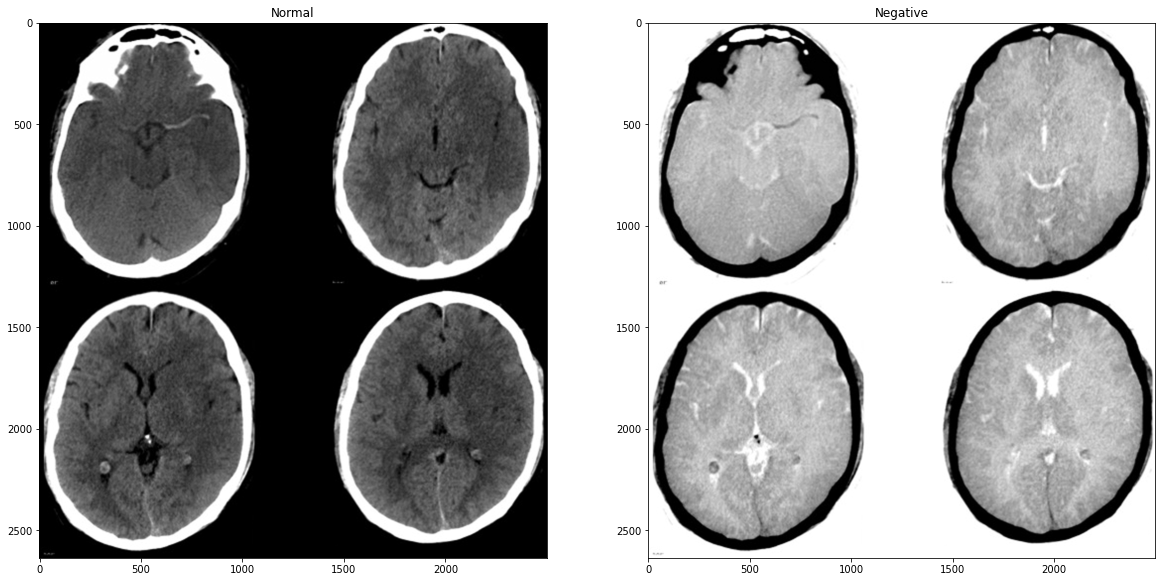

In [ ]:
# read and convert the image to grayscale
image = cv2.imread("lcbrain.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #La librería lee directamente en BRG

# bitwise lets us perform and, or, not operations. bitwise_not will negate the values. 
image_negative = cv2.bitwise_not(image)

# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(image_negative, cmap='gray')

## Exponential or Power Law Transformation

This transformation can help make corrections to the intensity levels of an image. For example, if the picture was taken in a very sunny or dark day. 

The transformation is defined by the following formula: $T(f)= (f(x,y)+esp)^γ$ where $esp$ and $γ$ are defined by us. 





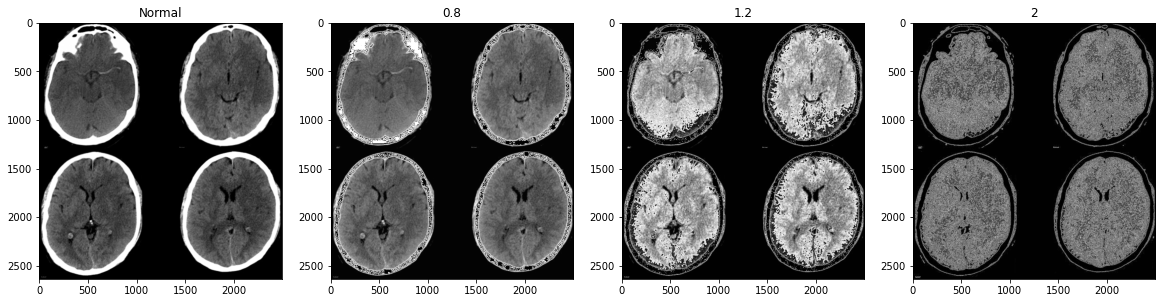

In [ ]:
# read and convert the image to grayscale
image = cv2.imread("lcbrain.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gammas = [0.8, 1.2, 2]

gamma_corrected = []

for gamma in gammas: 
      
    # apply gamma correction. 
    gamma_corrected.append(np.array((image+1) ** gamma, dtype = 'uint8'))
  

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title(gammas[0])
ax2.imshow(gamma_corrected[0], cmap='gray')
ax3.set_title(gammas[1])
ax3.imshow(gamma_corrected[1], cmap='gray')
ax4.set_title(gammas[2])
ax4.imshow(gamma_corrected[2], cmap='gray')

## Histogram equalization

This transformation lets us balance the contrast of an image; hopefully giving a more uniform dataset.

Histogram equalisation is a way to distribute the pixel intensities within an image in a more uniform manner. The image's cumulative frequency plot can be used as to transform the intensities in the image in order to achieve this. 

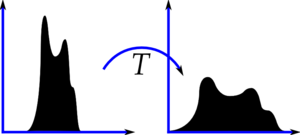

There are two principal methods when it comes about applying histogram equalizaiton: one using a direct OpenCV function and another processing every step individually. It's important to see both. 

### equalizeHist() function

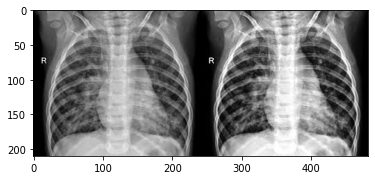

In [ ]:
# Read an image in grayscale
# img = cv2.imread('lcbrain.jpg',0)
img = cv2.imread('lungs.jpg',0)

# Gets an equalized image
equ = cv2.equalizeHist(img)

# Stacks images side-by-side
res = np.hstack((img,equ)) 

plt.imshow(res,cmap="gray")

### Sequential equalization

Calculate the gray level frequency histogram 

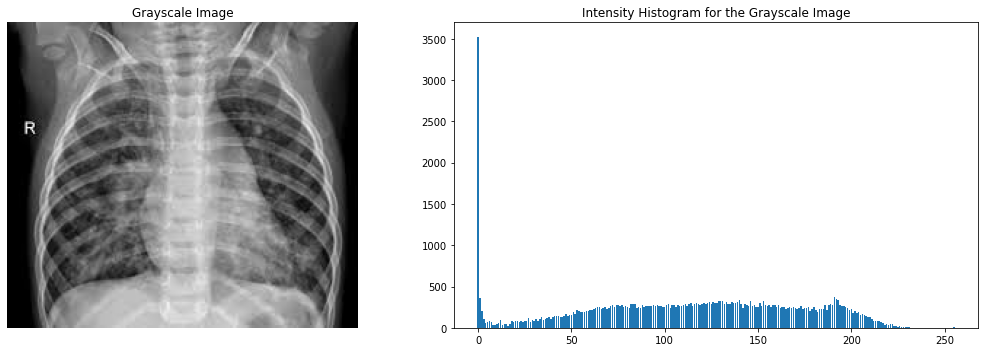

In [ ]:
# load the image
# img = cv2.imread("lcbrain.jpg",0)
# img = cv2.imread('brigth.jpg',0)
# img = cv2.imread("brain.jpeg")
img = cv2.imread("lungs.jpg")


# generate the intensity histogram for the image
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([img],[0],None,[256],[0,256])

# plot the grayscale image and the histogram
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Grayscale Image")
ax1.imshow(img, cmap="gray")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Intensity Histogram for the Grayscale Image")
ax2.bar(range(0, 256), hist.reshape(-1))
fig.tight_layout()
plt.show()

The cumulative frequency array of an image is calculated using the numpy function cumsum, which has parameters:

* a - an input array, here is it the histogram values that have been divided by the number of pixels in the image being used.
* axis - the axis here is not specified so the cumsum is calculated over the flattened array.

By dividing each element in this array by the number of pixels in the image the cumulative probabiliy graph can be plotted that has the pixel intensity range as the x-axis values and 0 to 1 as the y-axis values.

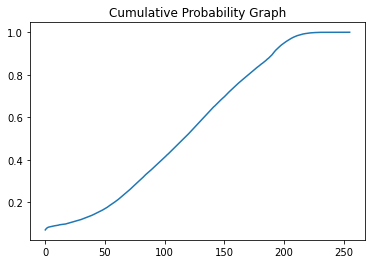

In [ ]:
# calculate the cumulative probability of the grayscale image
n_pixels = img.shape[0] * img.shape[1]
cf = np.cumsum(hist/n_pixels)

plt.title("Cumulative Probability Graph")
plt.plot(cf)


To have equal contrast in an image, the cumulative probability plot should look like a straight diagonal line through the origin. To achieve this the cumulative probability at each pixel value in the image is multiplied by the maximum intensity value of the new image (here it will be 256 as we are working with grayscale still) and this then becomes the new intensity value for the pixel:

$$ cp_i * 256 = pi_i $$

Where $ cp_i $ is the cumulative probability at pixel $ i $ and $ pi_i $ is the new, transformed intensity at pixel $ i $.

In [ ]:
alt_img = cv2.imread("lungs.jpg", 0)

# for each pixel the intensity becomes the cumulative probability of 
# that intensity multiplied by the maximum intensity
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
            alt_img[row, col] = cf[img[row, col]] * 256
            
# Next, we should round everything and put is as int
alt_img = np.round(alt_img).astype("uint8")
        
# generate the intensity histogram for the altered image
eq_hist = cv2.calcHist([alt_img],[0],None,[256],[0,256])

# plot picture and the cumulative probability graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Original Grayscale Image")
ax1.imshow(img, cmap='gray')

ax2 = plt.subplot(1, 2, 2)
ax2.set_axis_off()
ax2.set_title("Equalised Grayscale Image")
ax2.imshow(alt_img, cmap='gray')

fig.tight_layout()
plt.show()

## Exercise 1

1. Implement the negative transformation using mathematical operations and numpy arrays. 

In order to achieve this point we must consider a linear transformation of this type:

    T(n) = An - B

For this case, if we want to invert the image, we must convert the 255 pixels to 0, the 240 to 10, etc. For doing this we can implement the next expression.

    T(n) = 255 - n

Where n is the pixel intensity deepness.

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255

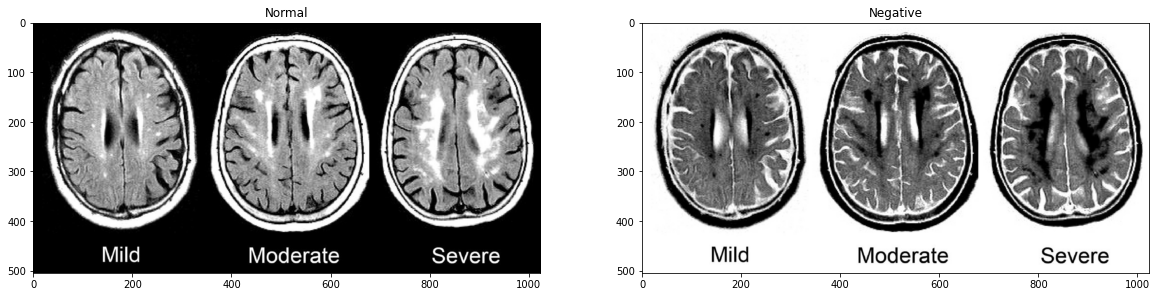

In [ ]:
# read the image
img = cv2.imread("brain.jpeg")
# show the pixels array
print(img)
# to invert subtract the maximum value with the other values
img_neg = 255 - img
# show inverted pixels array
print(img_neg)
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(img, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(img_neg, cmap='gray')

2. Select one of the noisy images from the following url: https://drive.google.com/drive/folders/12cbG23XbzMBvot5UyML8l1z61GLHm53T?usp=sharing 
Then, implement one or multiple methods explained above in order to enhance the image. You are also free to implement any of the methods you researched for this class. 
Remember that we are mainly working with grayscale images. 

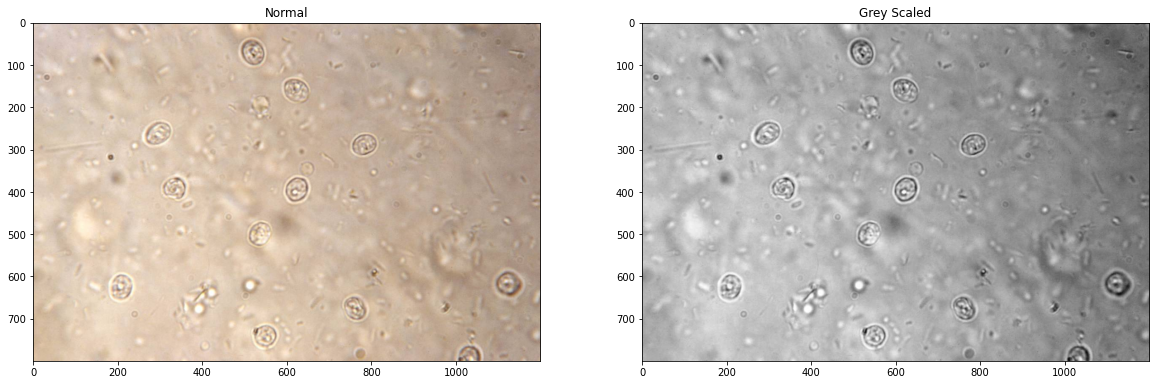

In [ ]:
# read and convert the image to grayscale
image_BGR = cv2.imread("parasite_water.jpg")
image_RGB = cv2.cvtColor(image_BGR,cv2.COLOR_BGR2RGB) 
# convert the image from RGB to greyscale
image_GRAY = cv2.cvtColor(image_RGB,cv2.COLOR_RGB2GRAY) 
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image_RGB)
ax2.set_title('Grey Scaled')
ax2.imshow(image_GRAY, cmap='gray')

SOLUTION:
-----
From this point, we are going to explore different alternatives for processing the image. First, I will focus on work to find de round objects, which mean to be parasite eggs on water, identify these eggs can be very useful to prevent diseases. Once the first part is completed I will try to obtain an image similar to the original but with the enhancement of contrast.
 
 ---


First part
-------------

A Laplacian Filter can be useful to highlights the areas of rapid changes in intensity and thus can be used for edge detection. The theory used for this can be found at (link:https://towardsdatascience.com/image-filters-in-python-26ee938e57d2)
It is mentioned that a Laplacian filter can get good results by working also with a Gaussian Filter, in order to first remove speckle noise and the to highlight the edges of the image.

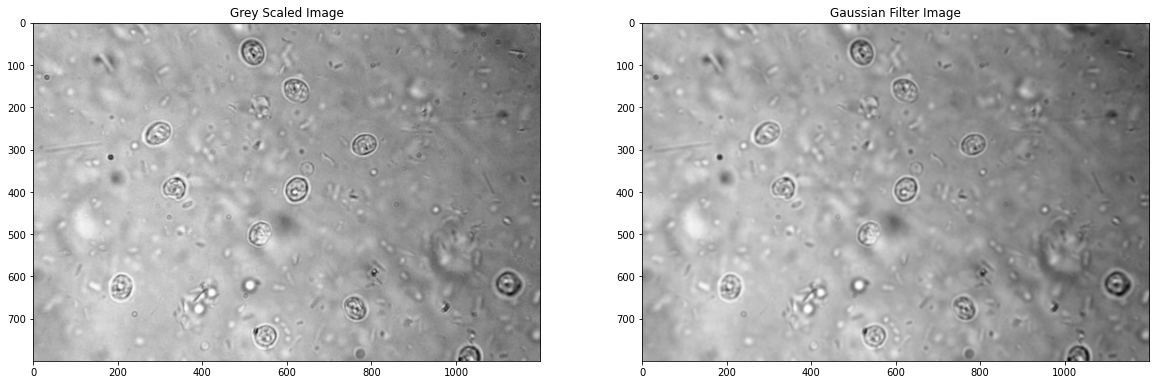

In [ ]:
#First appy the Gaussian Filter
image_filtered1 = cv2.GaussianBlur(image_GRAY, (9,9), 0)
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Grey Scaled Image')
ax1.imshow(image_GRAY, cmap="gray")
ax2.set_title('Gaussian Filter Image')
ax2.imshow(image_filtered1, cmap='gray')

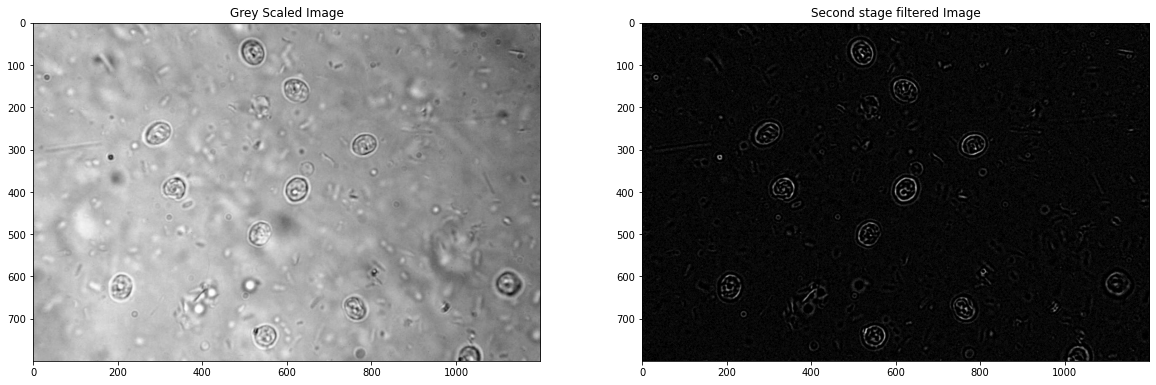

In [ ]:
#Now apply a Laplacian filter to get the edges
image_filtered2 = cv2.Laplacian(image_filtered1, cv2.CV_8UC1) #We define CV_8U as unsigned 8bit/pixel values 0-255
#image_GRAY_filtered = image_GRAY_filtered + image_GRAY 
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Grey Scaled Image')
ax1.imshow(image_GRAY, cmap="gray")
ax2.set_title('Second stage filtered Image')
ax2.imshow(image_filtered2, cmap='gray')

A very useful technique to preprocess images is thresholding. In few words if we want to leave the pixels belonging to the shapes “on,” while turning the rest of the pixels “off,” by setting their color channel values to zeros. In the previously mentioned case of study this can be very usefull, all the documentation used can be found at (link: https://datacarpentry.org/image-processing/07-thresholding/).


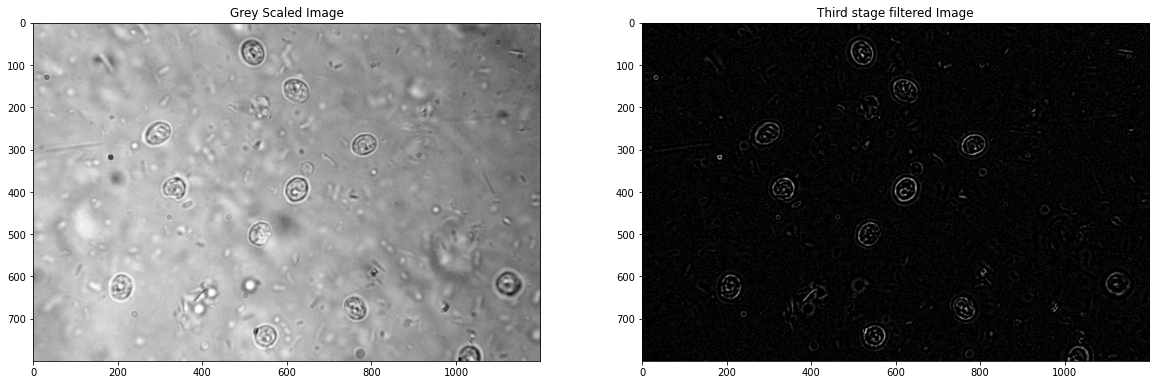

In [ ]:
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
t = skimage.filters.threshold_otsu(image_filtered2)
mask = image_filtered2 > t
image_filtered3 = np.zeros_like(image_filtered2)
image_filtered3[mask] = image_filtered2[mask]
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Grey Scaled Image')
ax1.imshow(image_GRAY, cmap="gray")
ax2.set_title('Third stage filtered Image')
ax2.imshow(image_filtered3, cmap='gray')

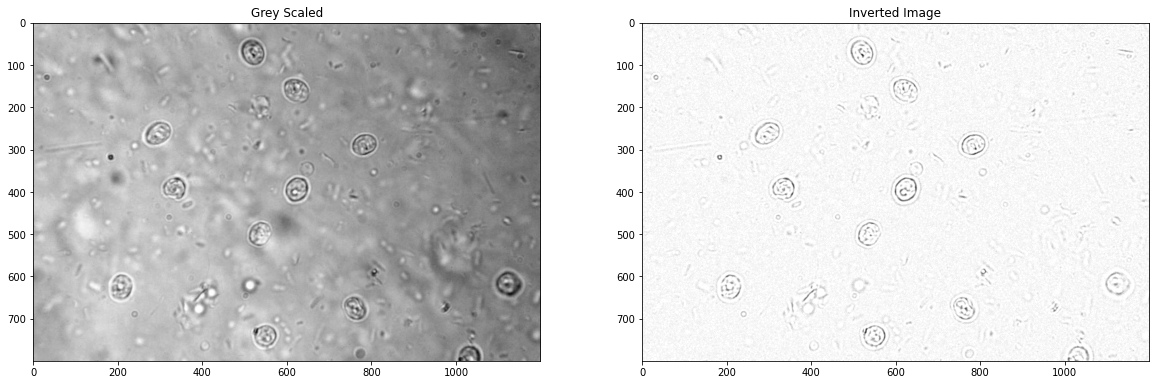

In [ ]:
# We can invert the image to analyse som characteristics 
image_negative = cv2.bitwise_not(image_filtered2)
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Grey Scaled')
ax1.imshow(image_GRAY, cmap='gray')
ax2.set_title('Inverted Image')
ax2.imshow(image_negative, cmap='gray')

From the last image, we can note that the principal objects in the image (Eggs) has been separated or highlighted.
Now, may a good practice will be to analyse the image information.

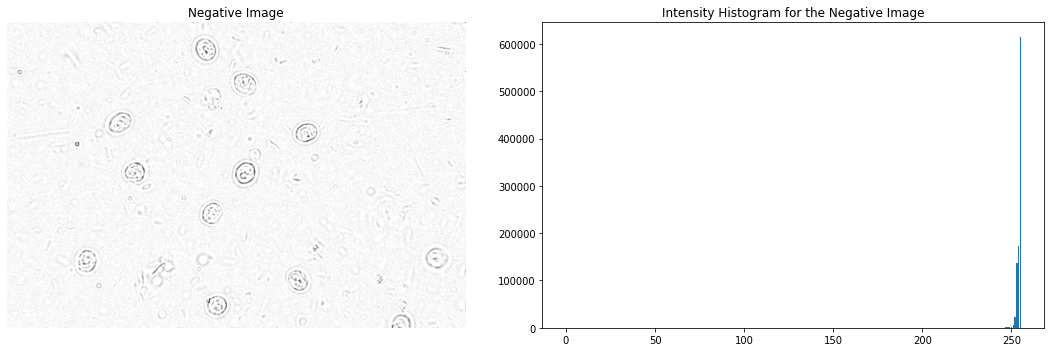

In [ ]:
# To analyse better the obtained image we can obtain an histogram.
hist = cv2.calcHist([image_negative],[0],None,[256],[0,256])

# plot the grayscale image and the histogram
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_axis_off()
ax1.set_title("Negative Image")
ax1.imshow(image_negative, cmap="gray")

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Intensity Histogram for the Negative Image")
ax2.bar(range(0, 256), hist.reshape(-1))
fig.tight_layout()
plt.show()


Analyzing the generated histogram, we can say that most of the pixels' deepness will be between approximately 250 and 255, which means a low contrast very bright image. 

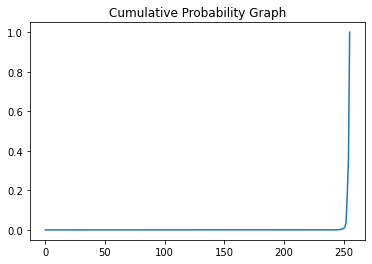

In [ ]:
# We can also calculate the cumulative probability of the inverted image to get more information
n_pixels = image_negative.shape[0] * image_negative.shape[1]
cf = np.cumsum(hist/n_pixels)

plt.title("Cumulative Probability Graph")
plt.plot(cf)

As was mentioned before, most part of the pixel will be between 250 and 255 approximately.
In this case is necessary to enhance the image contrast.


Now we will apply the Histogram equalization technique in order to normalize the image histogram and increase the image contrast.

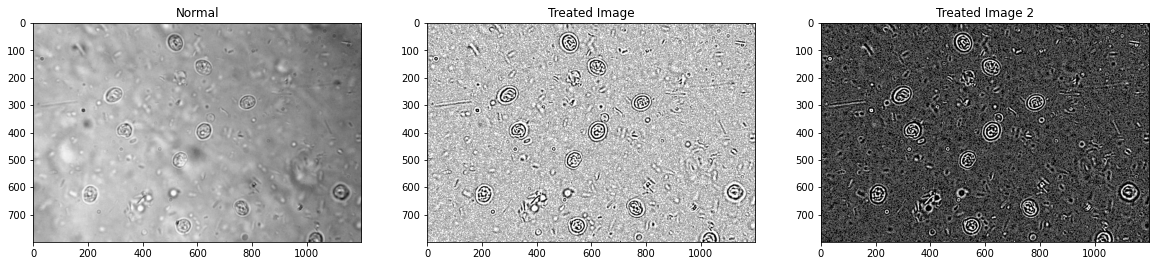

In [ ]:
# Gets an equalized image
image_equ = cv2.equalizeHist(image_negative)
# Invert the image
image_equ_1 = cv2.bitwise_not(image_equ)
# plot the three images
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(image_GRAY, cmap='gray')
ax2.set_title('Treated Image')
ax2.imshow(image_equ, cmap='gray')
ax3.set_title('Treated Image 2')
ax3.imshow(image_equ_1, cmap='gray')

The second image (image_equ) is the equalized one. And the third image (image_equ_1) is the inverted one from the previous.

All this processing was done with later applications in mind, as mentioned at the beginning, I focused on enhancing the contrast paying particular attention to the shapes with clear contours. This was done with the intention that in a later study, we could attempt to identify these objects based on their highlighted contours.

--------

Part 2
------
In this second part, we will try to get an image more similar to the original one but with an enhanced contrast.


To achieve this, let's see that in image x it can be clearly seen that the contours of the most important shapes in the image have a pixel depth very close to 255, that is, they are very bright. On the other hand, the secondary parts of the image, which don't represent a contour or are simply part of the background tend to a depth closer to 0, that is, they are very dark.

Therefore, if we want to highlight image object contours, in this case, parasites and parasites eggs; but also we want to keep the form or colour of the original image, we must add the original with the processed image.

In this way, the background and the other parts of the original image pixel deepness will be added to the highlighted contours from the treated image. 

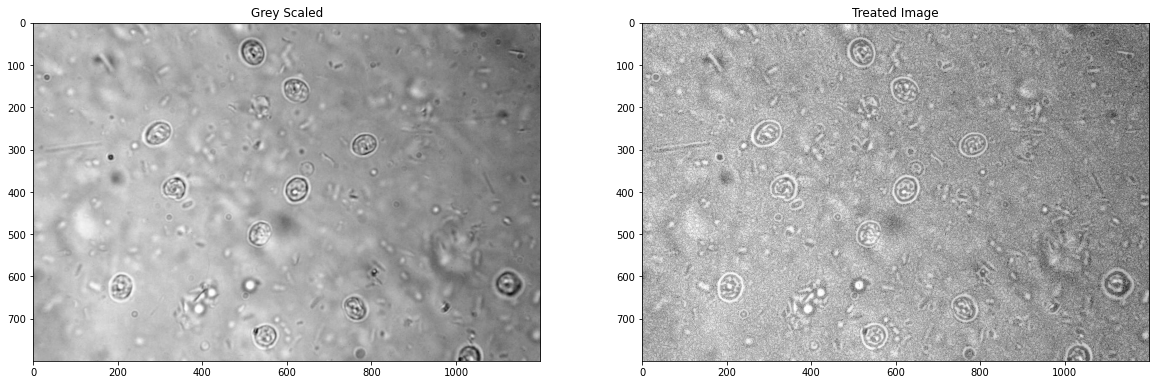

In [ ]:
image_treated = image_equ_1 + image_GRAY
# plot both images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Grey Scaled')
ax1.imshow(image_GRAY, cmap='gray')
ax2.set_title('Treated Image')
ax2.imshow(image_treated, cmap='gray')


Finally we will analyze the histograms generated for the treated image.

------------

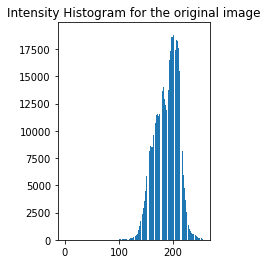

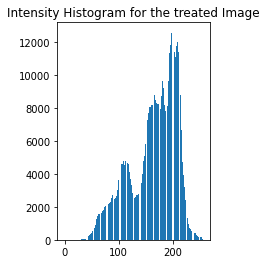

In [ ]:
hist2 = cv2.calcHist([image_GRAY],[0],None,[256],[0,256])
hist3 = cv2.calcHist([image_treated],[0],None,[256],[0,256])

# plot the grayscale image and the histogram
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Intensity Histogram for the original image")
ax1.bar(range(0, 256), hist2.reshape(-1))
fig.tight_layout()
plt.show()

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Intensity Histogram for the treated Image")
ax2.bar(range(0, 256), hist3.reshape(-1))
fig.tight_layout()
plt.show()

Analyzing the upper image we can see that the intensity values ​​are in a small range, and the most frequent intensity value is circa 190.
On the other hand, in the image below, we can see that the range of values ​​has been increased, and the most frequent value are circa 170 and 190.

Now, if we take the contrast as the range of intensity values ​​available in an image. We can define the next expression.

    Contrast = Pmax - Pmin

Where Pmax is the max pixel intensity deepness and Pmin is the min pixel intensity deepness. Working with the original one aproximated values.

    Contrast = 250 - 90 = 160

Now working with the processed one aproximated values.

    Contrast = 250 - 40 = 210

Taking this metric we can say that the image contrast have been increased in a 31.25%.

------

May better results could be obtained, but with the perspective indicated at the beginning of a subsequent recognition processing in the image image_equ_1 image, I believe that the results obtained for this exercise were satisfactory.